In [30]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 替换为实际的中文字体名称
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 加载数据
data = pd.read_csv("优惠券核销数据.csv")

# 查看数据的基本信息
print(data.head())
print(data.info())
print(data.describe())


   Accepted  Sex  Age  Class  AvgSpending
0         0    2    1      1           38
1         0    1    1      1           33
2         0    2    1      1           37
3         0    2    1      1           40
4         0    2    1      1           34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Accepted     891 non-null    int64
 1   Sex          891 non-null    int64
 2   Age          891 non-null    int64
 3   Class        891 non-null    int64
 4   AvgSpending  891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB
None
         Accepted         Sex         Age       Class  AvgSpending
count  891.000000  891.000000  891.000000  891.000000   891.000000
mean     0.616162    1.352413    1.674523    1.691358    59.132435
std      0.486592    0.477990    0.468816    0.836071    45.776231
min      0.000000    1.000000    1.000000    1.00000

In [31]:
# 假设Graphviz的可执行文件路径是 /path/to/graphviz/bin
graphviz_path = r'C:/_program/Graphviz2.38/bin'

# 设置环境变量
import os
os.environ['PATH'] += os.pathsep + graphviz_path

In [32]:
# 将分类变量编码为数值变量
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Class'] = label_encoder.fit_transform(data['Class'])

data['Accepted'] = label_encoder.fit_transform(data['Accepted'])

# 检查编码后的数据
print(data.head())

   Accepted  Sex  Age  Class  AvgSpending
0         0    1    0      0           38
1         0    0    0      0           33
2         0    1    0      0           37
3         0    1    0      0           40
4         0    1    0      0           34


In [33]:
# 定义特征和目标变量
X = data.drop(columns=['Accepted'])  # 特征
y = data['Accepted']  # 目标变量

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

print("训练集样本数：", len(X_train))
print("测试集样本数：", len(X_test))

训练集样本数： 712
测试集样本数： 179


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [35]:
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)

In [36]:
estimator = LogisticRegression(random_state=48)
estimator.fit(X_train, y_train)

LogisticRegression(random_state=48)

In [37]:
y_pred = estimator.predict(X_test)
print("Accuracy:", y_pred)

score = estimator.score(X_test, y_test)
print("Score:", score)

Accuracy: [1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0]
Score: 0.8268156424581006


In [38]:
print(estimator.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 48, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [39]:
ret = classification_report(y_test, y_pred)
print(ret)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        72
           1       0.84      0.88      0.86       107

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [40]:
y_test = np.where(y_test > 0.5, 1, 0)
roc_auc_score(y_test, y_pred)

0.8142523364485981

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 初始化决策树模型
dt_classifier = DecisionTreeClassifier(random_state=48)

# # 初始化支持向量机模型
# svm_classifier = SVC(random_state=48)

# # 初始化梯度提升树模型
# gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=48)

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=15, random_state=48)

# 初始化AdaBoost模型
# adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=48)


In [42]:
from xgboost import XGBClassifier

XGBR_classifier = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=50,  objective='binary:logistic', random_state=48)
XGBR_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=48, ...)

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

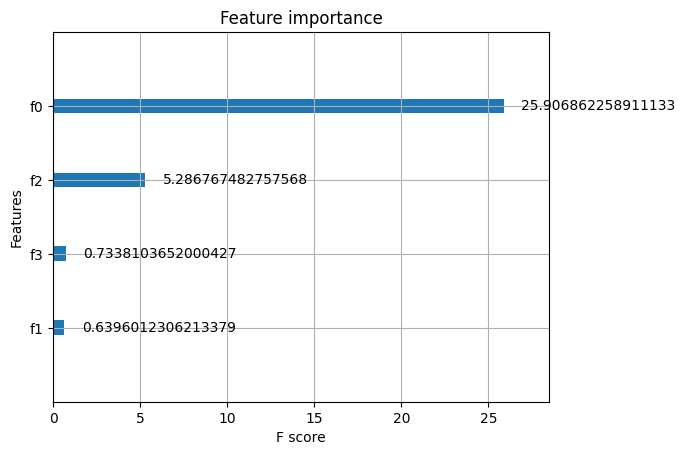

In [43]:
import xgboost as xgb
import matplotlib.pyplot as plt

y_pred = XGBR_classifier.predict(X_test)
xgb.plot_importance(XGBR_classifier, importance_type='gain')
plt.show()

<Axes: >

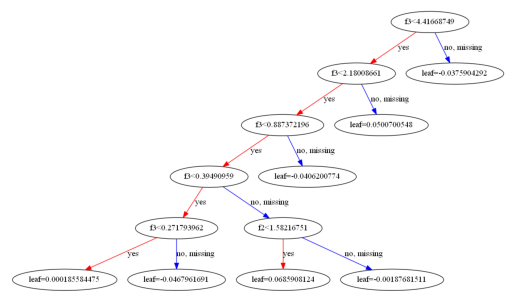

In [44]:

xgb.plot_tree(XGBR_classifier,num_trees=48)

In [45]:
XGBR_classifier.fit(X_train, y_train)
xgb_y_pred = XGBR_classifier.predict(X_test)
print('xgboost混淆矩阵:',confusion_matrix(y_test,xgb_y_pred))
print('xgboostf1得分:',f1_score(y_test,xgb_y_pred))
rf_accuracy = accuracy_score(y_test, xgb_y_pred)
print("xgboost准确率：", rf_accuracy)

xgboost混淆矩阵: [[45 27]
 [11 96]]
xgboostf1得分: 0.8347826086956521
xgboost准确率： 0.7877094972067039


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 1, 2]
}

# 创建 XGBClassifier 实例
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=48)

# 创建 GridSearchCV 实例
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 获得最佳模型
best_xgb_clf = grid_search.best_estimator_

Best parameters found:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3}


In [47]:
best_xgb_clf.fit(X_train, y_train)
xgb_y_pred = best_xgb_clf.predict(X_test)
print('xgboost混淆矩阵:',confusion_matrix(y_test,xgb_y_pred))
print('xgboostf1得分:',f1_score(y_test,xgb_y_pred))
rf_accuracy = accuracy_score(y_test, xgb_y_pred)
print("xgboost准确率：", rf_accuracy)

xgboost混淆矩阵: [[47 25]
 [12 95]]
xgboostf1得分: 0.8370044052863436
xgboost准确率： 0.7932960893854749


In [48]:
# # 训练逻辑回归模型
# lr_classifier.fit(X_train, y_train)
# lr_y_pred = lr_classifier.predict(X_test)
# lr_accuracy = accuracy_score(y_test, lr_y_pred)
# print("逻辑回归准确率：", lr_accuracy)

# 训练决策树模型
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
print('决策树混淆矩阵:',confusion_matrix(y_test,dt_y_pred))
print('决策树f1得分:',f1_score(y_test,dt_y_pred))
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("决策树准确率：", dt_accuracy)

# # 训练支持向量机模型
# svm_classifier.fit(X_train, y_train)
# svm_y_pred = svm_classifier.predict(X_test)
# svm_accuracy = accuracy_score(y_test, svm_y_pred)
# print("支持向量机准确率：", svm_accuracy)

# # 训练梯度提升树模型
# gb_classifier.fit(X_train, y_train)
# gb_y_pred = gb_classifier.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_y_pred)
# print("梯度提升树准确率：", gb_accuracy)

# 训练随机森林模型
print("\n")
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
print('随机森林混淆矩阵:',confusion_matrix(y_test,rf_y_pred))
print('随机森林f1得分:',f1_score(y_test,rf_y_pred))
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("随机森林准确率：", rf_accuracy)

# 训练AdaBoost模型
# print("\n")
# adaboost_classifier.fit(X_train, y_train)
# adaboost_y_pred = adaboost_classifier.predict(X_test)
# print('AdaBoost混淆矩阵:',confusion_matrix(y_test,adaboost_y_pred))
# print('AdaBoostf1得分:',f1_score(y_test,adaboost_y_pred))
# adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
# print("AdaBoost准确率：", adaboost_accuracy)

决策树混淆矩阵: [[46 26]
 [18 89]]
决策树f1得分: 0.8018018018018018
决策树准确率： 0.7541899441340782


随机森林混淆矩阵: [[47 25]
 [17 90]]
随机森林f1得分: 0.8108108108108109
随机森林准确率： 0.7653631284916201


In [49]:
# # 算法调优
# from sklearn.model_selection import GridSearchCV

# # 初始化AdaBoost模型
# adaboost_classifier = AdaBoostClassifier()

# # 设置参数网格
# param_grid = {
#     'n_estimators': [10,20,30, 100, 50],
#     'learning_rate': [0.001,0.002,0.005, 0.01,0.1,0.5, 1.0],
#     'base_estimator': [DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=3)]
# }

# # 使用GridSearchCV进行参数调优
# adaboost_grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
# adaboost_grid_search.fit(X_train, y_train)

# # 输出最佳参数
# print("最佳参数：", adaboost_grid_search.best_params_)

# # 使用最佳参数的模型进行预测
# adaboost_best_model = adaboost_grid_search.best_estimator_
# adaboost_y_pred = adaboost_best_model.predict(X_test)
# adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
# print("AdaBoost准确率：", adaboost_accuracy)

In [50]:
# from sklearn.linear_model import LogisticRegression
# 
# # 初始化逻辑回归模型
# logistic_regression = LogisticRegression()
# 
# # 设置参数网格
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 2.0, 10.0, 100.0]
# }
# 
# # 使用GridSearchCV进行参数调优
# logistic_regression_grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
# logistic_regression_grid_search.fit(X_train, y_train)
# 
# # 输出最佳参数
# print("最佳参数：", logistic_regression_grid_search.best_params_)
# 
# # 使用最佳参数的模型进行预测
# logistic_regression_best_model = logistic_regression_grid_search.best_estimator_
# logistic_regression_y_pred = logistic_regression_best_model.predict(X_test)
# logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)
# print("逻辑回归准确率：", logistic_regression_accuracy)


In [51]:
# from sklearn.ensemble import GradientBoostingClassifier
# 
# # 初始化梯度提升树模型
# gradient_boosting_classifier = GradientBoostingClassifier()
# 
# # 设置参数网格
# param_grid = {
#     'n_estimators': [50, 100, 300],
#     'learning_rate': [0.01, 0.001, 10.0],
#     'max_depth': [3, 5, 10]
# }
# 
# # 使用GridSearchCV进行参数调优
# gradient_boosting_grid_search = GridSearchCV(gradient_boosting_classifier, param_grid, cv=5)
# gradient_boosting_grid_search.fit(X_train, y_train)
# 
# # 输出最佳参数
# print("最佳参数：", gradient_boosting_grid_search.best_params_)
# 
# # 使用最佳参数的模型进行预测
# gradient_boosting_best_model = gradient_boosting_grid_search.best_estimator_
# gradient_boosting_y_pred = gradient_boosting_best_model.predict(X_test)
# gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_y_pred)
# print("梯度提升树准确率：", gradient_boosting_accuracy)


In [52]:
# 显示混淆矩阵和分类报告
class_report = classification_report(y_test, xgb_y_pred)
print("分类报告：\n", class_report)

分类报告：
               precision    recall  f1-score   support

           0       0.80      0.65      0.72        72
           1       0.79      0.89      0.84       107

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [53]:
import joblib
joblib.dump(dt_classifier,'dt_classifier.pkl')

['dt_classifier.pkl']

In [54]:
# 决策树可视化
import graphviz
import os

from sklearn import tree
dot_data = tree.export_graphviz(dt_classifier,
                                feature_names=X.columns.tolist(), # 特征名称
                                class_names=y.unique().astype(str).tolist(), # 目标变量的类别名
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(source=dot_data,filename='dt_gv',format='png',)
graph.render(cleanup=True) # 保存模型可视化为png图片


'dt_gv.png'

In [55]:
from sklearn.tree import export_graphviz
# 可视化随机森林中的第一棵树
dot_data = export_graphviz(rf_classifier.estimators_[0], out_file=None, 
                           feature_names=X_train.columns,  # 假设 X_train.columns 包含了特征名称
                           class_names=rf_classifier.classes_.astype(str).tolist(),
                           filled=True, rounded=True, special_characters=True)

# 使用 graphviz 库将 DOT 数据转换为可视化图形
graph = graphviz.Source(dot_data)
graph.render("rf_tree")  # 会创建一个名为 "rf_tree.pdf" 的文件


from IPython.display import IFrame
IFrame('rf_tree.pdf', width='100%', height=400)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

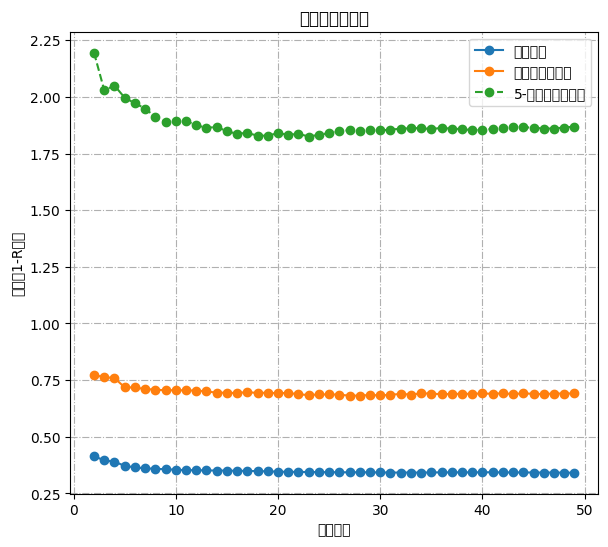

In [ ]:
# 基于重抽样自举法的集成学习应用示例

from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
matplotlib.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 替换为实际的中文字体名称
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 假设数据已经准备好，X和Y是特征和目标变量的数据集

X = data.drop(columns=['Accepted'])  # 特征
y = data['Accepted']  # 目标变量

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

trainErr = []
testErr = []
CVErr = []
K = np.arange(2, 50)

for k in K:
    modelRF = RandomForestRegressor(n_estimators=k, random_state=48)
    modelRF.fit(X_train, y_train)
    trainErr.append(1 - modelRF.score(X_train, y_train))
    testErr.append(1 - modelRF.score(X_test, y_test))
    Err = 1 - cross_val_score(modelRF, X, y, cv=5, scoring='r2')
    CVErr.append(Err.mean())

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle='-.')
ax1.plot(K, trainErr, label="训练误差", marker='o', linestyle='-')
ax1.plot(K, testErr, label="旁置法测试误差", marker='o', linestyle='-')
ax1.plot(K, CVErr, label="5-折交叉验证误差", marker='o', linestyle='--')
ax1.set_xlabel("树的数量")
ax1.set_ylabel("误差（1-R方）")
ax1.set_title('树的数量和误差')
ax1.legend()

plt.show()


In [ ]:
from sklearn.tree import export_graphviz
# 可视化随机森林中的第一棵树
dot_data = export_graphviz(rf_classifier.estimators_[0], out_file=None, 
                           feature_names=X_train.columns,  # 假设 X_train.columns 包含了特征名称
                           class_names=rf_classifier.classes_.astype(str).tolist(),
                           filled=True, rounded=True, special_characters=True)

# 使用 graphviz 库将 DOT 数据转换为可视化图形
graph = graphviz.Source(dot_data)
graph.render("rf_tree")  # 会创建一个名为 "rf_tree.pdf" 的文件


from IPython.display import IFrame
IFrame('rf_tree.pdf', width='100%', height=400)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\ensemble\_bagging.py:1225: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\ensemble\_bagging.py:1225: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\_program\miniconda3\envs\mining\lib\site-packages\sklearn\ensemble\_bagging.py:

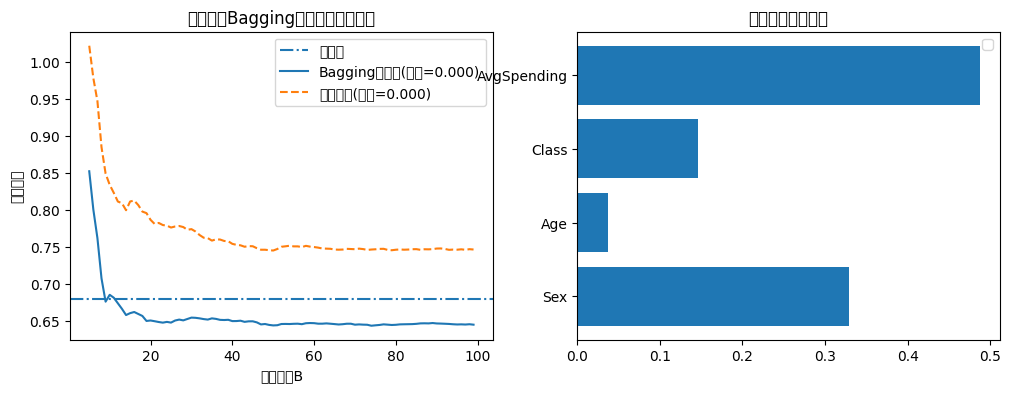

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# 假设数据已经准备好，X和Y是特征和目标变量的数据集

modelDTR = DecisionTreeRegressor(max_depth=5, random_state=48)
dtrErr = 1 - cross_val_score(modelDTR, X_train, y_train, cv=10, scoring='r2')

BagY0 = []
bagErr = []
rfErr = []
rfY0 = []

for b in np.arange(5, 100):
    Bag = BaggingRegressor(estimator=modelDTR, n_estimators=b, oob_score=True, random_state=48, bootstrap=True)
    Bag.fit(X_train, y_train)
    bagErr.append(1 - Bag.oob_score_)
    BagY0.append(Bag.predict(X_test))
    
    RF = RandomForestRegressor(n_estimators=b, oob_score=True, random_state=48, bootstrap=True, max_features='sqrt')
    RF.fit(X_train, y_train)
    rfErr.append(1 - RF.oob_score_)
    rfY0.append(RF.predict(X_test))

# 将预测结果从数组转换为单个平均值
BagY0_mean = np.mean(BagY0, axis=1)
rfY0_mean = np.mean(rfY0, axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].axhline(y=dtrErr.mean(), linestyle='-.', label="回归树")
axes[0].plot(np.arange(5, 100), bagErr, linestyle='-', label="Bagging回归树(方差=%.3f)" % np.var(BagY0_mean))
axes[0].plot(np.arange(5, 100), rfErr, linestyle='--', label="随机森林(方差=%.3f)" % np.var(rfY0_mean))
axes[0].set_title("回归树、Bagging回归树和随机森林")
axes[0].set_xlabel("树的棵树B")
axes[0].set_ylabel("测试误差")
axes[0].legend()

axes[1].barh(y=np.arange(len(X.columns)), width=RF.feature_importances_, tick_label=X.columns)
axes[1].set_title("输入变量的重要性")
# for x, y in enumerate(RF.feature_importances_):
#     axes[1].text(y + 0.01, x + 1, '%s' % round(y, 3))

plt.legend()
plt.show()
